In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df=pd.read_csv("/content/movies.csv")
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [ ]:
df.shape

(4803, 24)

In [ ]:
df.corr()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
index,1.000000,-0.761579,0.190771,-0.414342,-0.522110,-0.319370,-0.120157,-0.442207
budget,-0.761579,1.000000,-0.089377,0.505414,0.730823,0.269851,0.093146,0.593180
id,0.190771,-0.089377,1.000000,0.031202,-0.050425,-0.153536,-0.270595,-0.004128
popularity,-0.414342,0.505414,0.031202,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,-0.522110,0.730823,-0.050425,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,-0.319370,0.269851,-0.153536,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,-0.120157,0.093146,-0.270595,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,-0.442207,0.593180,-0.004128,0.778130,0.781487,0.271944,0.312997,1.000000


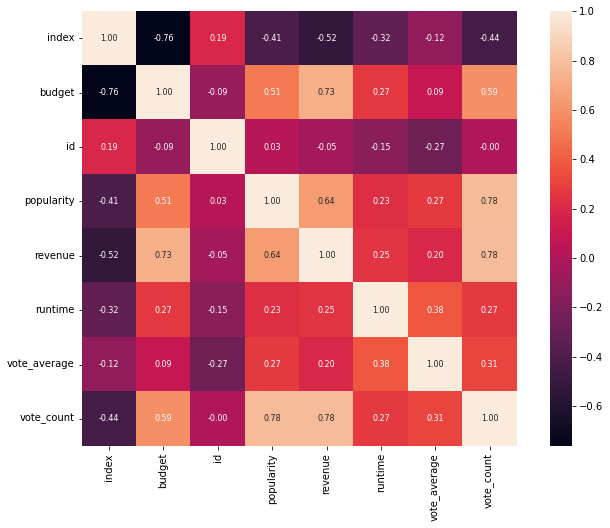

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cbar='True',square = 'True',annot = True ,annot_kws={'size':8},fmt='.2F')

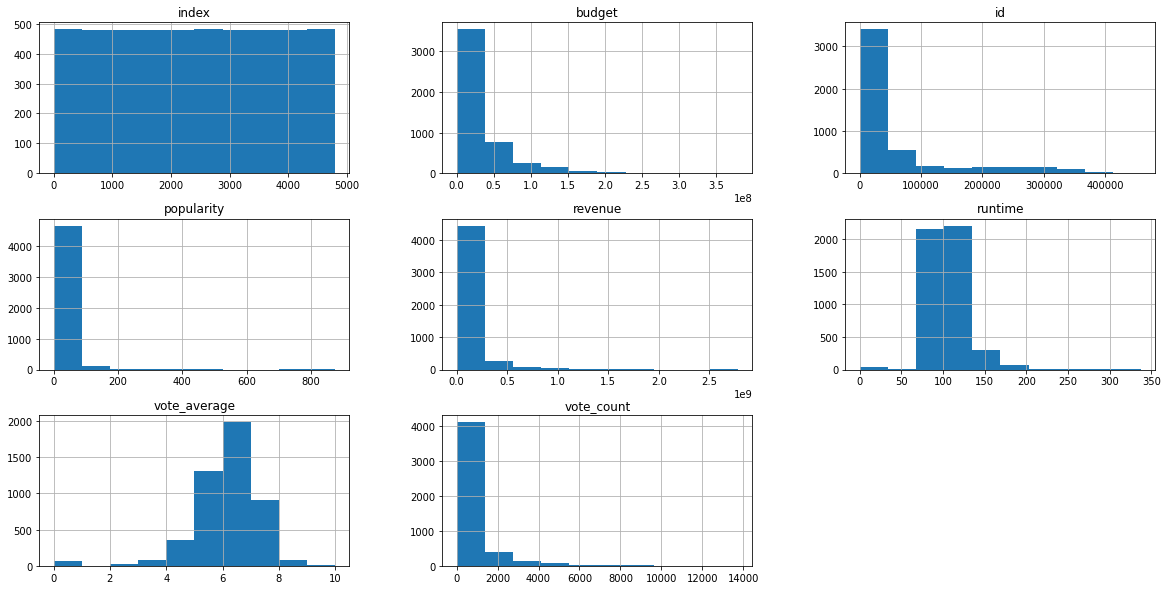

In [ ]:
df.hist(figsize=(20,10))
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [ ]:
df.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [ ]:
df.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [ ]:
# selecting the relevant features for recommendation

selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [ ]:
# replacing the null valuess with null string

for feature in selected_features:
  df[feature] = df[feature].fillna('')

In [ ]:
# combining all the 5 selected features

combined_features = df['genres']+' '+df['keywords']+' '+df['tagline']+' '+df['cast']+' '+df['director']

In [ ]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [ ]:
# converting the text data to feature vectors

vectorizer = TfidfVectorizer()

In [ ]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [ ]:
print(feature_vectors)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

In [ ]:
# getting the similarity scores using cosine similarity

similarity = cosine_similarity(feature_vectors)

In [ ]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [ ]:
print(similarity.shape)

(4803, 4803)


In [ ]:

movie_name = input(' Enter your favourite movie name : ')

 Enter your favourite movie name : X-Men


In [ ]:
#creating a list with all the movie names given in the dataset

list_of_all_titles = df['title'].tolist()
print(list_of_all_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [ ]:
#finding the close match for the movie name given by the user

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['X-Men']


In [ ]:
close_match = find_close_match[0]
print(close_match)

X-Men


In [ ]:
#finding the index of the movie with title

index_of_the_movie = df[df.title == close_match]['index'].values[0]
print(index_of_the_movie)

511


In [ ]:
#getting a list of similar movies

similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 0.03647753430158105), (1, 0.05087088847265282), (2, 0.0416053153499683), (3, 0.007028865344294996), (4, 0.06091269614715286), (5, 0.015111442288935762), (6, 0.008393203995517712), (7, 0.30503667400855367), (8, 0.008564899017378301), (9, 0.17257674017343938), (10, 0.1773757471627631), (11, 0.012958710024510678), (12, 0.014894517669525192), (13, 0.013447680316823224), (14, 0.2617021903908788), (15, 0.03281456310646618), (16, 0.2892396085894662), (17, 0.04326745036155882), (18, 0.02692867485136077), (19, 0.08112112881490473), (20, 0.1546628258528742), (21, 0.012242436381205115), (22, 0.07879989036663512), (23, 0.007170493016404263), (24, 0.013761848648217001), (25, 0.011420492122465048), (26, 0.18555552518616772), (27, 0.06548117161719494), (28, 0.03648176120095934), (29, 0.02713017181176397), (30, 0.12084386304959978), (31, 0.15049377529939592), (32, 0.031798195400729576), (33, 0.7683352060750761), (34, 0.0), (35, 0.038410943812450346), (36, 0.03461132563796877), (37, 0.008719128102

In [ ]:
print(len(similarity_score))

4803


In [ ]:
#sorting the movies based on their similarity score

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
print(sorted_similar_movies)

[(511, 1.0), (203, 0.8020105939311993), (33, 0.7683352060750761), (46, 0.5339762647326846), (64, 0.4199610808423527), (232, 0.3169572791682747), (7, 0.30503667400855367), (182, 0.29039034658640334), (16, 0.2892396085894662), (122, 0.2755918214749496), (79, 0.2730515322021464), (174, 0.27137178214439295), (4759, 0.26485458581881616), (14, 0.2617021903908788), (788, 0.25941605139073487), (126, 0.2585989157015958), (38, 0.24900969484678248), (101, 0.2355412501029049), (85, 0.1966064654482402), (870, 0.1939300789079758), (26, 0.18555552518616772), (10, 0.1773757471627631), (468, 0.17522433546097574), (142, 0.17338563152653708), (9, 0.17257674017343938), (68, 0.16702973947860686), (48, 0.15909676101586132), (163, 0.1577454992021575), (4401, 0.1576199790286503), (1230, 0.15735489558631252), (20, 0.1546628258528742), (1740, 0.15377789574206424), (31, 0.15049377529939592), (242, 0.15029451147436115), (254, 0.14488426262298354), (1192, 0.14388877599797364), (169, 0.13979385052498208), (3053, 0.

In [ ]:
#print the name of similar movies based on the index

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = df[df.index==index]['title'].values[0]
  if (i<100):
    print(i, '-->',title_from_index)
    i+=1

Movies suggested for you : 

1 --> Taken 2
2 --> Taken
3 --> Taken 3
4 --> Zoom
5 --> The Eye
6 --> Mallrats
7 --> The Wackness
8 --> The Hudsucker Proxy
9 --> Mighty Joe Young
10 --> Colombiana
11 --> I Spy
12 --> 2016: Obama's America
13 --> Rob Roy
14 --> Copycat
15 --> High Heels and Low Lifes
16 --> Made
17 --> Quigley Down Under
18 --> The Extra Man
19 --> Lords of Dogtown
20 --> The Outsiders
21 --> The Joneses
22 --> Con Air
23 --> The Quiet American
24 --> The Ghastly Love of Johnny X
25 --> Along Came a Spider
26 --> Freeheld
27 --> House on Haunted Hill
28 --> The Little Vampire
29 --> X2
30 --> Abduction
31 --> Drive
32 --> Ready to Rumble
33 --> The Edge
34 --> The Saint
35 --> 30 Days of Night
36 --> The Blues Brothers
37 --> Men of War
38 --> Faster
39 --> Grown Ups 2
40 --> X-Men: The Last Stand
41 --> Small Time Crooks
42 --> Monsters
43 --> Michael Collins
44 --> Not Another Teen Movie
45 --> DOA: Dead or Alive
46 --> Lage Raho Munna Bhai
47 --> Batman Begins
48 --> R

#Movie recommender system

In [ ]:
movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = df['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = df[df.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = df[df.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

 Enter your favourite movie name : betman
Movies suggested for you : 

1 . Hitman
2 . Mr. & Mrs. Smith
3 . Quantum of Solace
4 . Mission: Impossible II
5 . The Warrior's Way
6 . The November Man
7 . The International
8 . The Bourne Identity
9 . The Jackal
10 . Centurion
11 . I Am Number Four
12 . G.I. Joe: Retaliation
13 . Oblivion
14 . Wanted
15 . Live Free or Die Hard
16 . Child 44
17 . The Divide
18 . Bridge of Spies
19 . The Celebration
20 . Anna Karenina
21 . The Bourne Ultimatum
22 . K-19: The Widowmaker
23 . Licence to Kill
24 . Lucky Number Slevin
25 . Eagle Eye
26 . Charlie's Angels: Full Throttle
27 . Killers
28 . Conspiracy Theory
29 . Dreamcatcher
